# 微積分
:label:`sec_calculus`

在2500年前，古希臘人把一個多邊形分成三角形，並把它們的面積相加，才找到計算多邊形面積的方法。
為了求出曲線形狀（比如圓）的面積，古希臘人在這樣的形狀上刻內接多邊形。
如 :numref:`fig_circle_area`所示，內接多邊形的等長邊越多，就越接近圓。
這個過程也被稱為*逼近法*（method of exhaustion）。

![用逼近法求圓的面積](../img/polygon-circle.svg)
:label:`fig_circle_area`

事實上，逼近法就是*積分*（integral calculus）的起源。
2000多年後，微積分的另一支，*微分*（differential calculus）被發明出來。
在微分學最重要的應用是優化問題，即考慮如何把事情做到最好。
正如在 :numref:`subsec_norms_and_objectives`中討論的那樣，
這種問題在深度學習中是無處不在的。
 
在深度學習中，我們"訓練"模型，不斷更新它們，使它們在看到越來越多的數據時變得越來越好。
通常情況下，變得更好意味著最小化一個*損失函數*（loss function），
即一個衡量"模型有多糟糕"這個問題的分數。
最終，我們真正關心的是生成一個模型，它能夠在從未見過的數據上表現良好。
但"訓練"模型只能將模型與我們實際能看到的數據相擬合。
因此，我們可以將擬合模型的任務分解為兩個關鍵問題：
 
* *優化*（optimization）：用模型擬合觀測數據的過程；
* *泛化*（generalization）：數學原理和實踐者的智慧，能夠指導我們生成出有效性超出用於訓練的數據集本身的模型。

為了幫助讀者在後面的章節中更好地理解優化問題和方法，
本節提供了一個非常簡短的入門教程，幫助讀者快速掌握深度學習中常用的微分知識。

## 導數和微分

我們首先討論導數的計算，這是幾乎所有深度學習優化算法的關鍵步驟。
在深度學習中，我們通常選擇對於模型參數可微的損失函數。
簡而言之，對於每個參數，
如果我們把這個參數*增加*或*減少*一個無窮小的量，可以知道損失會以多快的速度增加或減少，
 
假設我們有一個函數$f: \mathbb{R} \rightarrow \mathbb{R}$，其輸入和輸出都是標量。
(**如果$f$的*導數*存在，這個極限被定義為**)

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)
:eqlabel:`eq_derivative`
 
如果$f'(a)$存在，則稱$f$在$a$處是*可微*（differentiable）的。
如果$f$在一個區間內的每個數上都是可微的，則此函數在此區間中是可微的。
我們可以將 :eqref:`eq_derivative`中的導數$f'(x)$解釋為$f(x)$相對於$x$的*瞬時*（instantaneous）變化率。
所謂的瞬時變化率是基於$x$中的變化$h$，且$h$接近$0$。
 
為了更好地解釋導數，讓我們做一個實驗。
(**定義$u=f(x)=3x^2-4x$**)如下：


In [16]:
%matplotlib inline
import matplotlib as plt
import numpy as np
from matplotlib_inline import backend_inline
#from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**透過令$x=1$並讓$h$接近$0$，**] :eqref:`eq_derivative`中(**$\frac{f(x+h)-f(x)}{h}$的數值結果接近$2$**)。
雖然這個實驗不是一個數學證明，但稍後會看到，當$x=1$時，導數$u'$是$2$。


In [17]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


讓我們熟悉一下導數的幾個等價符號。
給定$y=f(x)$，其中$x$和$y$分別是函數$f$的自變量和因變量。以下表達式是等價的：
 
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$
 
其中符號$\frac{d}{dx}$和$D$是*微分運算符*，表示*微分*操作。
我們可以使用以下規則來對常見函數求微分：
 
* $DC = 0$（$C$是一個常數）
* $Dx^n = nx^{n-1}$（*冪律*（power rule），$n$是任意實數）
* $De^x = e^x$
* $D\ln(x) = 1/x$

為了微分一個由一些常見函數組成的函數，下面的一些法則方便使用。
假設函數$f$和$g$都是可微的，$C$是一個常數，則：
 
*常數相乘法則*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法則*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法則*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法則*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

現在我們可以應用上述幾個法則來計算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。
令$x=1$，我們有$u'=2$：在這個實驗中，數值結果接近$2$，
這一點得到了在本節前面的實驗的支持。
當$x=1$時，此導數也是曲線$u=f(x)$切線的斜率。
 
[**為了對導數的這種解釋進行可視化，我們將使用`matplotlib`**]，
這是一個Python中流行的繪圖庫。
要配置`matplotlib`生成圖形的屬性，我們需要(**定義幾個函數**)。
在下面，`use_svg_display`函數指定`matplotlib`軟體包輸出svg圖表以獲得更清晰的圖像。
 
注意，註釋`#@save`是一個特殊的標記，會將對應的函數、類或語句保存在`d2l`包中。
因此，以後無須重新定義就可以直接調用它們（例如，`d2l.use_svg_display()`）。


In [11]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

我們定義`set_figsize`函數來設置圖表大小。
注意，這裡可以直接使用`d2l.plt`，因為導入語句
`from matplotlib import pyplot as plt`已標記為保存到`d2l`包中。(這邊直接import matplotlib)


In [12]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

下面的`set_axes`函數用於設置由`matplotlib`生成圖表的軸的屬性。


In [13]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

透過這三個用於圖形配置的函數，定義一個`plot`函數來簡潔地繪製多條曲線，
因為我們需要在整本書中視覺化許多曲線。


In [14]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.pyplot.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

現在我們可以[**繪製函數$u=f(x)$及其在$x=1$處的切線$y=2x-3$**]，
其中係數$2$是切線的斜率。


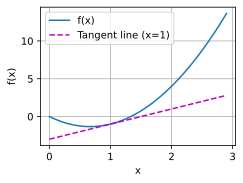

In [22]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏導數

到目前為止，我們只討論了僅含一個變量的函數的微分。
在深度學習中，函數通常依賴於許多變量。
因此，我們需要將微分的思想推廣到*多元函數*（multivariate function）上。

設$y = f(x_1, x_2, \ldots, x_n)$是一個具有$n$個變量的函數。
$y$關於第$i$個參數$x_i$的*偏導數*（partial derivative）為：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

為了計算$\frac{\partial y}{\partial x_i}$，
我們可以簡單地將$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常數，
並計算$y$關於$x_i$的導數。
對於偏導數的表示，以下是等價的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

## 梯度
:label:`subsec_calculus-grad`

我們可以連結一個多元函數對其所有變量的偏導數，以得到該函數的*梯度*（gradient）向量。
具體而言，設函數$f:\mathbb{R}^n\rightarrow\mathbb{R}$的輸入是
一個$n$維向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，並且輸出是一個標量。
函數$f(\mathbf{x})$相對於$\mathbf{x}$的梯度是一個包含$n$個偏導數的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在沒有歧義時被$\nabla f(\mathbf{x})$取代。

假設$\mathbf{x}$為$n$維向量，在微分多元函數時經常使用以下規則:

* 對於所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 對於所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 對於所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同樣，對於任何矩陣$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。
正如我們之後將看到的，梯度對於設計深度學習中的優化算法有很大用處。

## 鏈式法則

然而，上面方法可能很難找到梯度。
這是因為在深度學習中，多元函數通常是*複合*（composite）的，
所以難以應用上述任何規則來微分這些函數。
幸運的是，鏈式法則可以被用來微分複合函數。

讓我們先考慮單變量函數。假設函數$y=f(u)$和$u=g(x)$都是可微的，根據鏈式法則：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

現在考慮一個更一般的場景，即函數具有任意數量的變量的情況。
假設可微分函數$y$有變量$u_1, u_2, \ldots, u_m$，其中每個可微分函數$u_i$都有變量$x_1, x_2, \ldots, x_n$。
注意，$y$是$x_1, x_2， \ldots, x_n$的函數。
對於任意$i = 1, 2, \ldots, n$，鏈式法則給出：

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

## 小結

* 微分和積分是微積分的兩個分支，前者可以應用於深度學習中的優化問題。
* 導數可以被解釋為函數相對於其變量的瞬時變化率，它也是函數曲線的切線的斜率。
* 梯度是一個向量，其分量是多變量函數相對於其所有變量的偏導數。
* 鏈式法則可以用來微分複合函數。

## 練習

1. 繪製函數$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$處切線的圖像。
1. 求函數$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。
1. 函數$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什麼？
1. 嘗試寫出函數$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的鏈式法則。


[Discussions](https://discuss.d2l.ai/t/1756)



1. 繪製函數$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$處切線的圖像。
---

### 解答(這是我的回答，不一定對歐)

需要完成以下幾步：
1. 定義函數 \( y = f(x) = x^3 - \frac{1}{x} \)。
2. 計算 \( x = 1 \) 處的導數（斜率）。
3. 根據點斜式方程求切線方程。
4. 使用 Matplotlib 繪製函數和切線。

以下是程式碼：

```python
import numpy as np
import matplotlib.pyplot as plt

# 定義函數 f(x) = x^3 - 1/x
def f(x):
    return x**3 - 1/x

# 計算導數 f'(x) = 3x^2 + 1/x^2
def df(x):
    return 3*x**2 + 1/x**2

# 計算切線的斜率和截距
x_tangent = 1  # 切線的點 x = 1
slope = df(x_tangent)  # 切線斜率
y_tangent = f(x_tangent)  # 切線通過的點 y
intercept = y_tangent - slope * x_tangent  # 切線截距

# 定義切線方程
def tangent_line(x):
    return slope * x + intercept

# 繪圖
x_vals = np.linspace(0.5, 1.5, 500)  # 避免 x = 0
plt.figure(figsize=(8, 6))

# 繪製原函數
plt.plot(x_vals, f(x_vals), label=r"$y = f(x) = x^3 - \frac{1}{x}$")

# 繪製切線
plt.plot(x_vals, tangent_line(x_vals), label="Tangent at $x=1$", linestyle="--")

# 標註切線點
plt.scatter([x_tangent], [y_tangent], color="red", label="Point of tangency ($x=1$)")

# 添加圖例和標籤
plt.title("Function and Tangent Line at $x=1$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()

# 顯示圖像
plt.show()
```

---

### 結果

1. 函數 \( y = f(x) = x^3 - \frac{1}{x} \) 的圖像將展示出該函數的非線性特性。
2. 切線通過點 \( (1, f(1)) \)，且與原函數在 \( x = 1 \) 處具有相同的斜率。

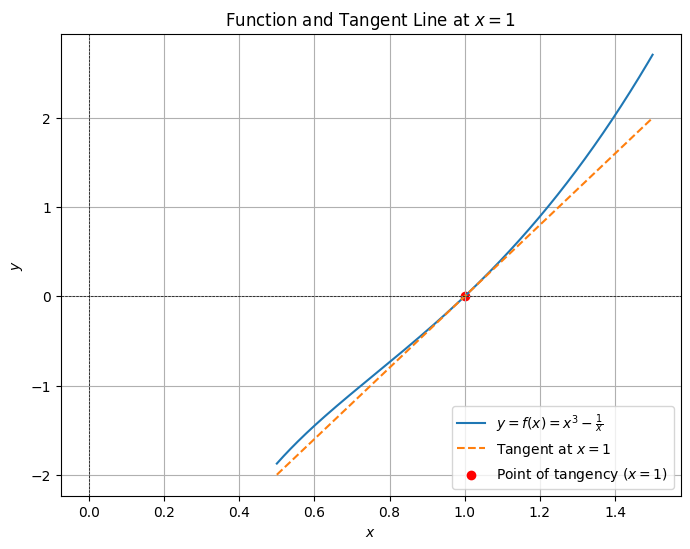

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義函數 f(x) = x^3 - 1/x
def f(x):
    return x**3 - 1/x

# 計算導數 f'(x) = 3x^2 + 1/x^2
def df(x):
    return 3*x**2 + 1/x**2

# 計算切線的斜率和截距
x_tangent = 1  # 切線的點 x = 1
slope = df(x_tangent)  # 切線斜率
y_tangent = f(x_tangent)  # 切線通過的點 y
intercept = y_tangent - slope * x_tangent  # 切線截距

# 定義切線方程
def tangent_line(x):
    return slope * x + intercept

# 繪圖
x_vals = np.linspace(0.5, 1.5, 500)  # 避免 x = 0
plt.figure(figsize=(8, 6))

# 繪製原函數
plt.plot(x_vals, f(x_vals), label=r"$y = f(x) = x^3 - \frac{1}{x}$")

# 繪製切線
plt.plot(x_vals, tangent_line(x_vals), label="Tangent at $x=1$", linestyle="--")

# 標註切線點
plt.scatter([x_tangent], [y_tangent], color="red", label="Point of tangency ($x=1$)")

# 添加圖例和標籤
plt.title("Function and Tangent Line at $x=1$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()

# 顯示圖像
plt.show()

2. 求函數$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。
---
這是我的回答，不一定對歐

要求函數 $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$ 的梯度，我們需要對函數 $f(\mathbf{x})$ 的每一個變數進行偏微分。
 
假設 $\mathbf{x} = [x_1, x_2]$，那麼梯度是向量 $\nabla f(\mathbf{x}) = [\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}]$。

1. 對 $x_1$ 求偏導數：
   $$
   \frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1} (3x_1^2 + 5e^{x_2}) = 6x_1
   $$

2. 對 $x_2$ 求偏導數：
   $$
   \frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2} (3x_1^2 + 5e^{x_2}) = 5e^{x_2}
   $$
 
因此，梯度為：
$$
\nabla f(\mathbf{x}) = [6x_1, 5e^{x_2}]
$$
 
若需代入特定值，可以將 $x_1$ 和 $x_2$ 替換成指定數值來計算具體的梯度結果。

３. 函數$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什麼？

---

我這個回答不一定正確，請參照著看。

要計算函數 $f(\mathbf{x}) = \|\mathbf{x}\|_2$ 的梯度，讓我們逐步解釋。

### 定義
向量的 2-範數定義為：
$$
\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}
$$
其中，$\mathbf{x} = [x_1, x_2, \dots, x_n]$。

因此，函數 $f(\mathbf{x})$ 可寫為：
$$
f(\mathbf{x}) = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}
$$

### 梯度計算
梯度是對每個變數的偏導數組成的向量：
$$
\nabla f(\mathbf{x}) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right]
$$

1. 先對 $f(\mathbf{x})$ 求 $x_i$ 的偏導數：
   $$
   \frac{\partial f}{\partial x_i} = \frac{\partial}{\partial x_i} \left( \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2} \right)
   $$

 2. 使用鏈式法則，將平方根的導數拆開：
   $$
   \frac{\partial f}{\partial x_i} = \frac{1}{2\sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}} \cdot \frac{\partial}{\partial x_i} \left( x_1^2 + x_2^2 + \cdots + x_n^2 \right)
   $$
 
 3. 對 $x_1^2 + x_2^2 + \cdots + x_n^2$ 求偏導數：
$$
   \frac{\partial}{\partial x_i} \left( x_1^2 + x_2^2 + \cdots + x_n^2 \right) = 2x_i
$$

4. 代回公式：
$$
\frac{\partial f}{\partial x_i} = \frac{x_i}{\sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}}
$$

### 梯度結果
將所有分量合併，梯度為：
$$
\nabla f(\mathbf{x}) = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}
$$
即每個分量為 $\frac{x_i}{\|\mathbf{x}\|_2}$，其中 $\mathbf{x} = [x_1, x_2, \dots, x_n]$。

這是向量範數的梯度，其方向為單位向量，大小為 1。

In [2]:
#4. 嘗試寫出函數$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的鏈式法則。
import sympy as sp

# 1. 建立符號變數 a, b
a, b = sp.symbols('a b', real=True)

# 2. 定義 x(a, b), y(a, b), z(a, b)
#   這裡只是舉例
x_expr = a**2 + b          # x = a^2 + b
y_expr = sp.sin(a * b)     # y = sin(a*b)
z_expr = a + b**2          # z = a + b^2

# 3. 在 sympy 裡，先定義 x, y, z 為一般符號，再為 f(x, y, z) 建立函數
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
z = sp.Symbol('z', real=True)

# 假設 f(x, y, z) = x^2 + y^3 + z
f = x**2 + y**3 + z

# 4. 將 x_expr, y_expr, z_expr 替換 (subs) 到 f 裡，得到 u(a, b)
u = f.subs({x: x_expr, y: y_expr, z: z_expr})

# 5. 計算鏈式法則後的偏導數
u_a = sp.diff(u, a)  # ∂u/∂a
u_b = sp.diff(u, b)  # ∂u/∂b

# 6. 列印結果
print("u(a, b) =", u)
print("∂u/∂a =", u_a)
print("∂u/∂b =", u_b)


u(a, b) = a + b**2 + (a**2 + b)**2 + sin(a*b)**3
∂u/∂a = 4*a*(a**2 + b) + 3*b*sin(a*b)**2*cos(a*b) + 1
∂u/∂b = 2*a**2 + 3*a*sin(a*b)**2*cos(a*b) + 4*b
